In [1]:
import pandas as pd
from sklearn.decomposition import KernelPCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

#Importing Dataset
Gene_Data = pd.read_csv('data_linear_CNA.csv')
Patient_Data = pd.read_csv('data_clinical_sample.csv')

#Extracting Y Value
Y = Patient_Data[['ONCOTREE_CODE', 'SAMPLE_ID']]
S = 'ONCOTREE_CODE'

#Drop ID Columns
Gene_Data = Gene_Data.drop('Hugo_Symbol',axis=1)
Gene_Data = Gene_Data.drop('Entrez_Gene_Id',axis=1)

#Transposing Data
X_old = Gene_Data.transpose()

#Normalizing Data to get rid of negative values
mm_scaler = preprocessing.MinMaxScaler()
X_old = pd.DataFrame(mm_scaler.fit_transform(X_old))
Y = Y.set_index('SAMPLE_ID')
X = pd.concat([X_old, pd.DataFrame(Y.values)], axis=1, ignore_index=True)
X = X.rename(columns={22247: "ONCOTREE_CODE"})
X = X.drop(X.index[-1])
X = X.drop(X.index[-1])

#Bar Chart to Display Classes
Y.ONCOTREE_CODE.value_counts().plot(kind='bar', title='Before Over Sampling');





In [2]:
#Replacing Classnames with integers
ClassList = []
for item in X[S]:
    if item == 'IDC':
        ClassList.append(0)
    elif item == 'ILC':
        ClassList.append(1)
    elif item == 'BRCA':
        ClassList.append(2)
    elif item == 'MDLC':
        ClassList.append(3)
    else:
        ClassList.append(-1)

#Adding Y to dataset
X[S] = ClassList
print(X)

            0         1         2         3         4         5         6  \
0    0.360560  0.360560  0.360560  0.360560  0.360560  0.360560  0.360560   
1    0.157137  0.157137  0.157137  0.157137  0.157137  0.157137  0.157137   
2    0.336445  0.336445  0.336445  0.336445  0.336445  0.336445  0.336445   
3    0.353948  0.353948  0.353948  0.353948  0.353948  0.353948  0.353948   
4    0.204979  0.204979  0.204979  0.204979  0.204979  0.204979  0.204979   
5    0.359782  0.359782  0.359782  0.359782  0.359782  0.359782  0.359782   
6    0.351225  0.351225  0.351225  0.351225  0.351225  0.351225  0.351225   
7    0.544535  0.544535  0.544535  0.544535  0.544535  0.544535  0.544535   
8    0.128355  0.128355  0.128355  0.128355  0.128355  0.128355  0.128355   
9    0.212758  0.212758  0.212758  0.212758  0.212758  0.212758  0.212758   
10   0.463633  0.463633  0.463633  0.463633  0.463633  0.463633  0.463633   
11   0.349280  0.349280  0.349280  0.349280  0.349280  0.349280  0.349280   

In [3]:
#Seperating Classes
D0 = X.query('ONCOTREE_CODE == "0"')
D1 = X.query('ONCOTREE_CODE == "1"')
D2 = X.query('ONCOTREE_CODE == "2"')
D3 = X.query('ONCOTREE_CODE == "3"')

#Appending Selected Classes
DF = D0.append(D1).append(D2).append(D3)
print(DF)


            0         1         2         3         4         5         6  \
3    0.353948  0.353948  0.353948  0.353948  0.353948  0.353948  0.353948   
4    0.204979  0.204979  0.204979  0.204979  0.204979  0.204979  0.204979   
5    0.359782  0.359782  0.359782  0.359782  0.359782  0.359782  0.359782   
6    0.351225  0.351225  0.351225  0.351225  0.351225  0.351225  0.351225   
7    0.544535  0.544535  0.544535  0.544535  0.544535  0.544535  0.544535   
8    0.128355  0.128355  0.128355  0.128355  0.128355  0.128355  0.128355   
9    0.212758  0.212758  0.212758  0.212758  0.212758  0.212758  0.212758   
10   0.463633  0.463633  0.463633  0.463633  0.463633  0.463633  0.463633   
12   0.373396  0.373396  0.373396  0.373396  0.373396  0.373396  0.373396   
13   0.429794  0.429794  0.429794  0.429794  0.429794  0.429794  0.429794   
14   0.344224  0.344224  0.344224  0.344224  0.344224  0.344224  0.344224   
16   0.326721  0.326721  0.326721  0.326721  0.326721  0.326721  0.326721   

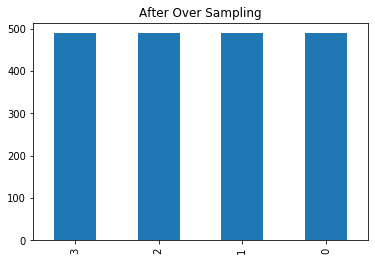

In [4]:
#Bar Chart to Display Selected Classes
#DF.ONCOTREE_CODE.value_counts().plot(kind='bar', title='Selected');

X_o = DF.iloc[:, 0:22247]
Y_o = DF['ONCOTREE_CODE']

#OverSampling unbalanced classes
smo = SMOTE(random_state=42,k_neighbors=10, sampling_strategy='not majority')
X_s, Y_s = smo.fit_resample(X_o, Y_o)

#Making Dataframes to make Bar Chart
X_d = pd.DataFrame(X_s)
Y_d = pd.DataFrame(Y_s)
X_d['ONCOTREE_CODE'] = Y_d

#Bar Chart to Display Selected Classes after Oversampling
X_d.ONCOTREE_CODE.value_counts().plot(kind='bar', title='After Over Sampling');

SVM 83.8
Random Forest Score: 0.8977853492333902
KNN Score: 0.7444633730834753
NB Score: 1.0


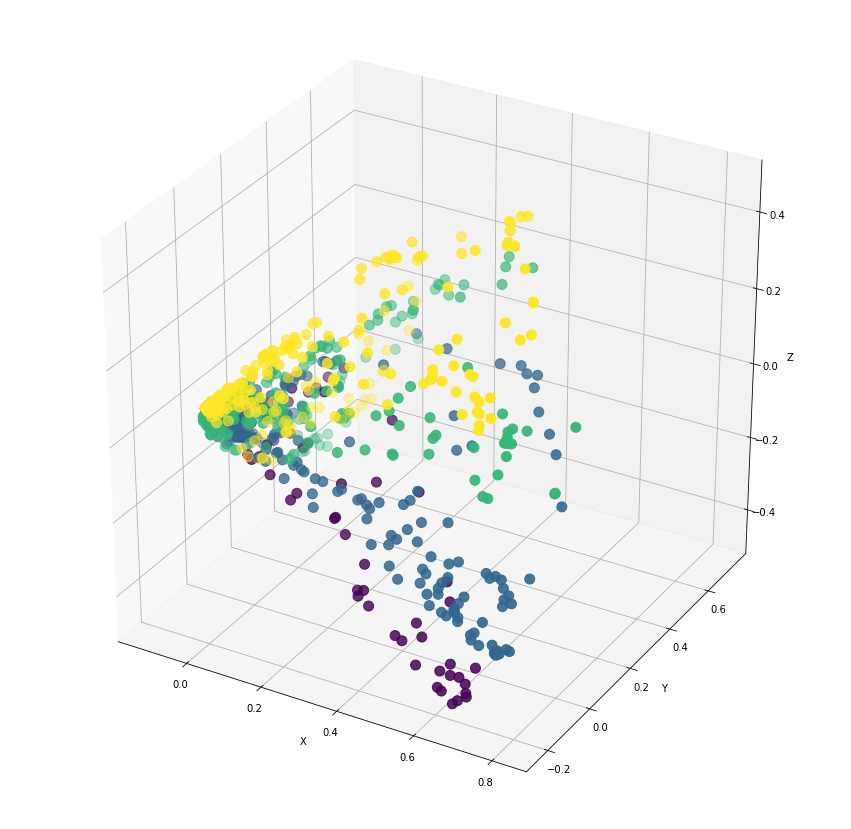

In [5]:
#Selecting K-Best Features
X_new = SelectKBest(chi2, k=10000).fit_transform(X_s,Y_s)

#Splitting Data to Training and Testing Data
Points_train, Points_test, Label_train, Label_test = train_test_split(X_new, Y_s,train_size=0.7,shuffle=True)   

#Applying Support Vector Machine Classifier with rbf kernel
svm = SVC(gamma= 0.1, kernel='rbf')
svm.fit(Points_train, Label_train)
Label_pred = svm.predict(Points_test)

#Checking SVM accuracy
print("SVM",str(round(sm.accuracy_score(Label_test, Label_pred)*100,1)))

#Random Forest
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(Points_train, Label_train);
predictions = rf.predict(Points_test)
print("Random Forest Score:",metrics.accuracy_score(Label_test, predictions))

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Points_train, Label_train)
print("KNN Score:",knn.score(Points_test, Label_test))

#Naive Bayes
clf = GaussianNB()
clf.fit(Points_train, Label_train)
Y_pred_gsn = clf.predict(Points_test)
print("NB Score:",metrics.accuracy_score(Label_test, Y_pred_gsn))

#Reducing dimensions for data visualization
kpca = KernelPCA(n_components=3, kernel='rbf',gamma=0.1)
X_pca = kpca.fit_transform(X_new)

#Plotting Graph
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
x = X_pca[:,0]
y = X_pca[:,1]
z = X_pca[:,2]
ax.scatter(x, y, z, c=Y_s,s=100, marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()